In [1]:
import numpy as np
from sklearn import preprocessing

Normalization

In [2]:
feature = np.array([[-500.5], [-100.1], [0], [100.1], [900.9]])

In [3]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [4]:
scaled_feature = minmax_scale.fit_transform(feature)

In [5]:
print(scaled_feature)

[[0.        ]
 [0.28571429]
 [0.35714286]
 [0.42857143]
 [1.        ]]


Standardization

In [6]:
x = np.array([[-1000.1], [-200.2], [500.5], [600.6], [9000.9]])

In [7]:
scaler = preprocessing.StandardScaler()

In [8]:
standardized = scaler.fit_transform(x)

In [9]:
print(standardized)

[[-0.76058269]
 [-0.54177196]
 [-0.35009716]
 [-0.32271504]
 [ 1.97516685]]


Outliers detection-example

In [10]:
import pandas as pd
df = pd.read_csv('Practice_File.csv', usecols=['LotArea', 'SalePrice'])
df.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [11]:
df.shape

(1460, 2)

In [12]:
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)

IQR = q3 - q1
print('q1 : ', q1)
print('q3 : ', q3)
print('IQR : ', IQR)

q1 :  129975.0
q3 :  214000.0
IQR :  84025.0


In [13]:
Lower_Whisker = q1 - (1.5 * IQR)
Upper_Whisker = q3 + (1.5 * IQR)
print('Upper_Whisker : ', Upper_Whisker)
print('Lower_Whisker : ', Lower_Whisker)

Upper_Whisker :  340037.5
Lower_Whisker :  3937.5


Outlier detection-IOR

In [14]:
print((df['SalePrice']<Lower_Whisker) | (df['SalePrice']>Upper_Whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


In [15]:
new_df = df[(df['SalePrice']>Lower_Whisker) & (df['SalePrice']<Upper_Whisker)]
new_df.shape

(1399, 2)

In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print('q1 :' )
print(q1)
print('q3 :' )
print(q3)
print('IQR : ')
print(IQR)

q1 :
LotArea        7553.5
SalePrice    129975.0
Name: 0.25, dtype: float64
q3 :
LotArea       11601.5
SalePrice    214000.0
Name: 0.75, dtype: float64
IQR : 
LotArea       4048.0
SalePrice    84025.0
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1a5cbae9950>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5cbf1f150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5cbe95dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5cbfe21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5cbd02cd0>],
 'means': []}

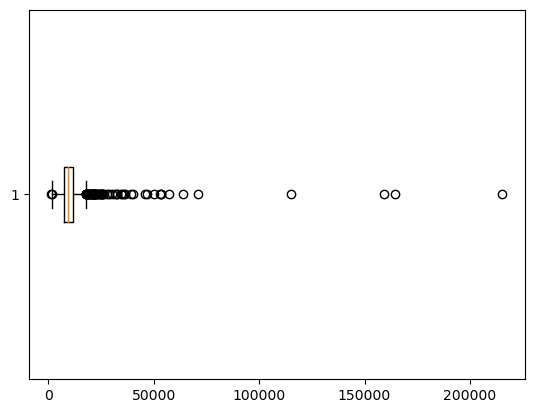

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(df['LotArea'], vert= False)

Text(0, 0.5, 'Sales Price')

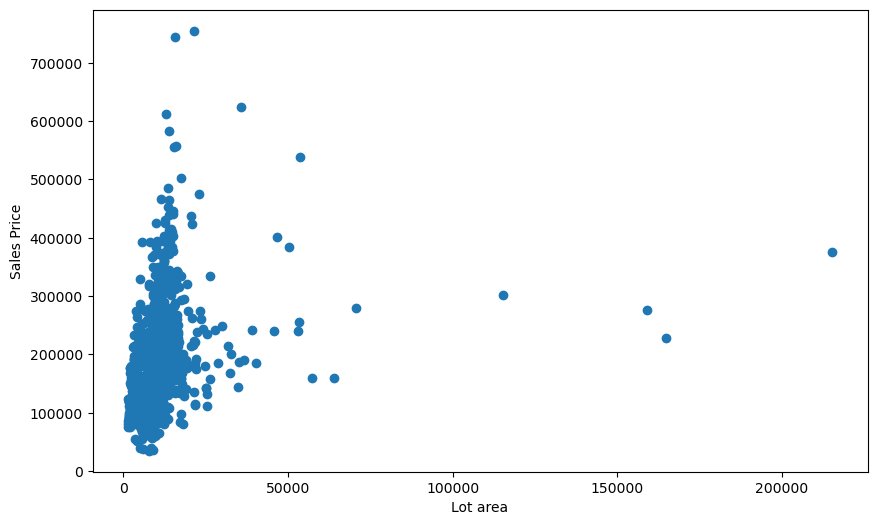

In [18]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(df['LotArea'], df['SalePrice'])
ax.set_xlabel('Lot area')
ax.set_ylabel('Sales Price')

Quantile-based Flooring and Capping

In [19]:
floor = (df['SalePrice'].quantile(0.01))
cap = (df['SalePrice'].quantile(0.99))
print('Floor : ', floor)
print('Cap : ', cap)

Floor :  61815.97
Cap :  442567.01000000053


In [20]:
import numpy as np

In [21]:
df1 = df.copy()
df1['SalePrice'] = np.where(df1['SalePrice']<floor, floor, df1['SalePrice'])
df1['SalePrice'] = np.where(df1['SalePrice']>cap, cap, df1['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5cbfd3d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5cc0f5390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5cc08fb50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5cc0f6990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5cc0f4e50>],
 'means': []}

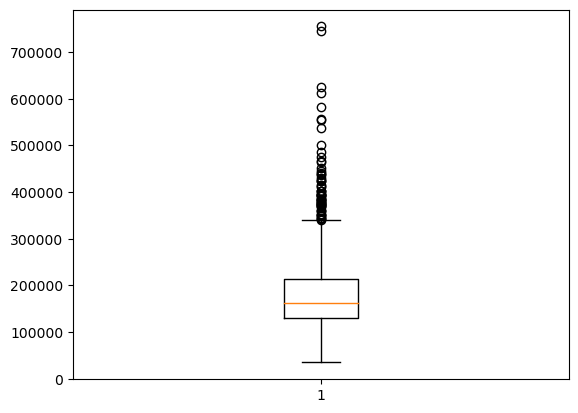

In [22]:
plt.boxplot(df['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5cc14e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5cc834290>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5cc13fe10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5cc8358d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5cc8363d0>],
 'means': []}

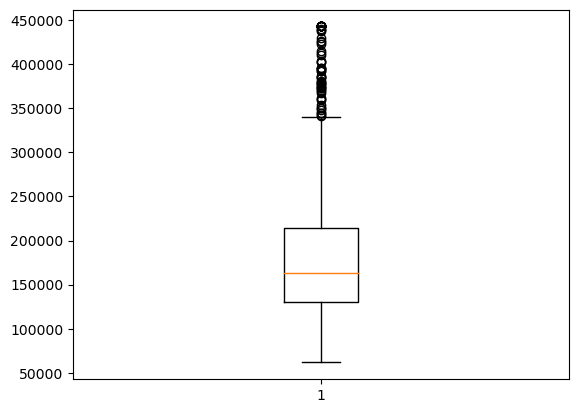

In [23]:
plt.boxplot(df1['SalePrice'])

In [24]:
df2 = df.copy()
print('Number of record in the table : ', df2.shape)
index = df2[(df2['SalePrice']> Upper_Whisker) | (df2['SalePrice']< Lower_Whisker)].index
index.shape

Number of record in the table :  (1460, 2)


(61,)

In [25]:
df2.drop(index, inplace=True)
df2.shape

(1399, 2)

In [26]:
print(df['SalePrice'].skew().round(2))

1.88


In [28]:
df['log_sale'] = df['SalePrice'].map(lambda i: np.log(i) if i>0 else 0)
print(df['log_sale'].skew().round(2))

0.12


<Axes: >

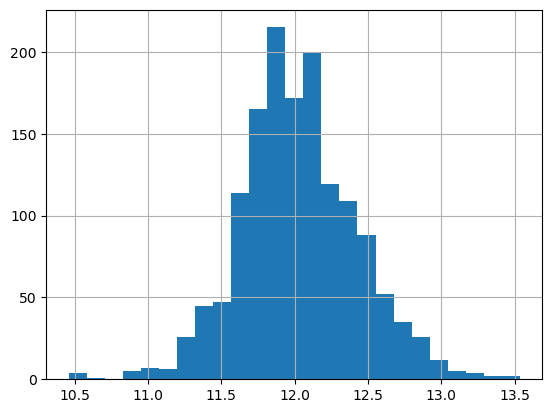

In [29]:
df["log_sale"].hist(bins = 25)

In [30]:
from sklearn.preprocessing import Binarizer

In [31]:
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
binarizer = Binarizer(threshold=18)

In [32]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [33]:
np.digitize(age, bins = [20,30,64])

array([[0],
       [0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)